# Nike Shoes Analysis
- Data: Scrapped products, characteristics, descriptions, ratings, and reviews of the shoes section of the Nike website for both male and female products. Acquired data on over 1,200 products and more than 30 thousand reviews.
- Objective: To understand the product offering of Nike, its composition in terms of quantity, price and type of products. As well as, to understand it's perceived strengths, weaknesses, and how it delivers value to its clients.

## Table of Contents:
* [Install Required Packages](#first-bullet)
* [Second Bullet Header](#second-bullet)

## Install Required Packages <a class="anchor" id="first-bullet"></a>

- Open **Terminal/Anaconda Prompt**, cd to the project and run the following command:
 - `pip install -r requirements.txt`

- After installing all the required packages, run the following command:
 - `python -m textblob.download_corpora`
 
- Restart this jupyter notebook.

## Importing Data and Cleaning

In [118]:
# Import libraries to be used

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import squarify
plt.style.use('ggplot')
import re

In [3]:
# Getting all the data from the csv files and joining them

df_men = pd.read_csv('./nike_shoes_men.csv', header=0, error_bad_lines = False, quotechar='"')
df_woman0 = pd.read_csv('./nike_shoes_woman0.csv', header=0, error_bad_lines = False, quotechar='"')
df_woman1 = pd.read_csv('./nike_shoes_woman1.csv', header=0, error_bad_lines = False, quotechar='"')

df = pd.concat([df_men, df_woman0, df_woman1])


In [4]:
# Replace slider values that are not correct
df = df.replace('[A-Za-z]', value = {"size" : None, "comfort" : None, "durability" : None}, regex=True)

In [516]:
df[df['size'].str.contains('[A-Za-z]', na=False)]

,id_,gender,title,url,category,price,description,description_long,n_reviews,score,size,comfort,durability,r_title,r_raiting,r_body,r_date


In [6]:
for i in df['category'].unique():
    print(i)

Soccer Shoe
Custom Shoe
Baseball Shoe
Lifestyle Shoe
Running Shoe
Golf Shoe
Hiking Shoe
nan
Basketball Shoe
Skate Shoe
Football Shoe
Tennis Shoe
Sandal
Boot
Training Shoe
Endurance Class Shoe
Racing Shoe
Lacrosse Shoe
Track Shoe
Trail Shoe
Unisex Throwing Shoe
Cycling Shoe
Unisex Jumping Spike
Unisex Throwing Spike
Lifestyle Shoe (Extra Wide)
Softball Shoe
Slip-On
Indoor Court Shoe
Volleyball Shoe
Cheerleading Shoe


In [5]:
# Create more meaningful categories by deleting redundancy, aggregating similar categories,
# and adding more informative categories

df = df.replace({'category' : { 'Shoe' : "Men's Shoe", "Men's Shoes" : "Men's Shoe"}})
df = df.replace({'category' : { ".+Running.+" : "Running Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Basketball.+" : "Basketball Shoe"}}, regex = True)
df = df.replace({'category' : { "Basketball.+" : "Basketball Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Baseball.+" : "Baseball Shoe"}}, regex = True)
df = df.replace({'category' : { "Baseball.+" : "Baseball Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Hiking.+" : "Hiking Shoe"}}, regex = True)
df = df.replace({'category' : { "HIIT.+" : "Training Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Skate.+" : "Skate Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Football.+" : "Football Shoe"}}, regex = True)
df = df.replace({'category' : { "Football.+" : "Football Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Slide.+" : "Sandal"}}, regex = True)
df = df.replace({'category' : { "Slide" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Boot.+" : "Boot"}}, regex = True)
df = df.replace({'category' : { ".+Boot$" : "Boot"}}, regex = True)
df = df.replace({'category' : { ".+Lacrosse.+" : "Lacrosse Shoe"}}, regex = True)
df = df.replace({'category' : { "Lacrosse.+" : "Lacrosse Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Lifestyle.+" : "Lifestyle Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Cycling.+" : "Cycling Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Thong.+" : "Sandal"}}, regex = True)
df = df.replace({'category' : { "Thong" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Flip Flop.+" : "Sandal"}}, regex = True)
df = df.replace({'category' : { "Flip Flop" : "Sandal"}}, regex = True)
df = df.replace({'category' : { "Flip-Flop" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Sandal.+" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Sandal" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Slide" : "Sandal"}}, regex = True)
df = df.replace({'category' : { "Slip$" : "Sandal"}}, regex = True) 
df = df.replace({'category' : { "^Slip-On$" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Softball.+" : "Softball Shoe"}}, regex = True)
df = df.replace({'category' : { "Softball.+" : "Softball Shoe"}}, regex = True)                
df = df.replace({'category' : { ".+Golf.+" : "Golf Shoe"}}, regex = True)
df = df.replace({'category' : { "Golf.+" : "Golf Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Soccer.+" : "Soccer Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Tennis.+" : "Tennis Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Training.+" : "Training Shoe"}}, regex = True)
df = df.replace({'category' : { "Custom.+" : "Custom Shoe"}}, regex = True)
df = df.replace({'category' : { "High Top" : "Lifestyle Shoe"}}, regex = True)
df = df.replace({'category' : { "Lifestyle Shoe \(Extra Wide\)" : "Lifestyle Shoe"}}, regex = True)
df = df.replace({'category' : { "Print Slide" : "Printed Slide"}}, regex = True)
df = df.replace({'category' : { "Racing.+" : "Racing Shoe"}}, regex = True)
df = df.replace({'category' : { "Unisex Racing Shoe" : "Racing Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Track.+" : "Track Shoe"}}, regex = True)
df = df.replace({'category' : { "^Track Spike$" : "Track Shoe"}}, regex = True)
df = df.replace({'category' : { "Unisex Shoe" : "Lifestyle Shoe"}}, regex = True)
df['category'] = df['category'].str.replace("Men's","")
df['category'] = df['category'].str.replace("Women's","")
df['category'] = df['category'].str.strip()
df = df.replace({'category' : { "^Shoe" : "Lifestyle Shoe"}}, regex = True)

In [7]:
# Converting certain columns data types to correct category

df = df.astype({"gender": 'category', 'category': 'category',
                "size": 'float64', 'comfort': 'float64', 'durability': 'float64', 'r_date' : 'datetime64'})

print(df.shape)
print(df.dtypes)
df.describe()

(35960, 17)
id_                          int64
gender                    category
title                       object
url                         object
category                  category
price                      float64
description                 object
description_long            object
n_reviews                  float64
score                      float64
size                       float64
comfort                    float64
durability                 float64
r_title                     object
r_raiting                  float64
r_body                      object
r_date              datetime64[ns]
dtype: object


,id_,price,n_reviews,score,size,comfort,durability,r_raiting
count,35960.000000,35950.000000,35519.000000,35519.000000,35138.000000,35138.000000,35138.000000,35519.000000
mean,387.172442,102.204256,438.456347,4.587212,47.497083,85.052365,73.543557,4.585715
std,209.561510,50.799157,582.444342,0.279373,11.031876,10.063183,13.583633,0.900332
min,1.000000,21.000000,1.000000,1.000000,14.500000,25.000000,20.000000,1.000000
25%,193.000000,65.000000,57.000000,4.500000,41.500000,80.000000,68.000000,5.000000
50%,415.000000,90.000000,183.000000,4.600000,48.500000,86.000000,76.000000,5.000000
75%,552.000000,125.000000,652.000000,4.800000,54.000000,93.000000,83.500000,5.000000
max,739.000000,400.000000,2298.000000,5.000000,100.000000,100.000000,100.000000,5.000000


## Handling missing values

In [9]:
# Getting an idea of where the missing values are

df.isnull().sum()

id_                    0
gender                 0
title                  0
url                    0
category               0
price                  0
description            0
description_long     136
n_reviews            431
score                431
size                 812
comfort              812
durability           812
r_title             2309
r_raiting            431
r_body               431
r_date               431
dtype: int64

There are 10 items that could not be scraped correctly because the HTML formating on the page changed. Also some items don't have long descriptions, reviews, a size/comfort/durability slider result.

We should drop the 10 items out of the list because they won't provide any value, its a small part of the total of over 1,200 products. Also the other missing values are correct because they are not present in the product page, not all fields have information in the product page.

In [8]:
df = df[df['title'].notna()]

## Numerical and Categorical Analysis and Graphs

### Distribution of Products per Category

Lifestyle Shoe     55.8
Running Shoe       12.9
Training Shoe       8.2
Sandal              6.0
Basketball Shoe     5.2
Soccer Shoe         3.1
Golf Shoe           1.8
Skate Shoe          1.5
Football Shoe       1.4
Boot                1.3
Name: category, dtype: float64


Text(0.5, 1.0, 'Number of Products per Category ')

<Figure size 6000x3000 with 0 Axes>

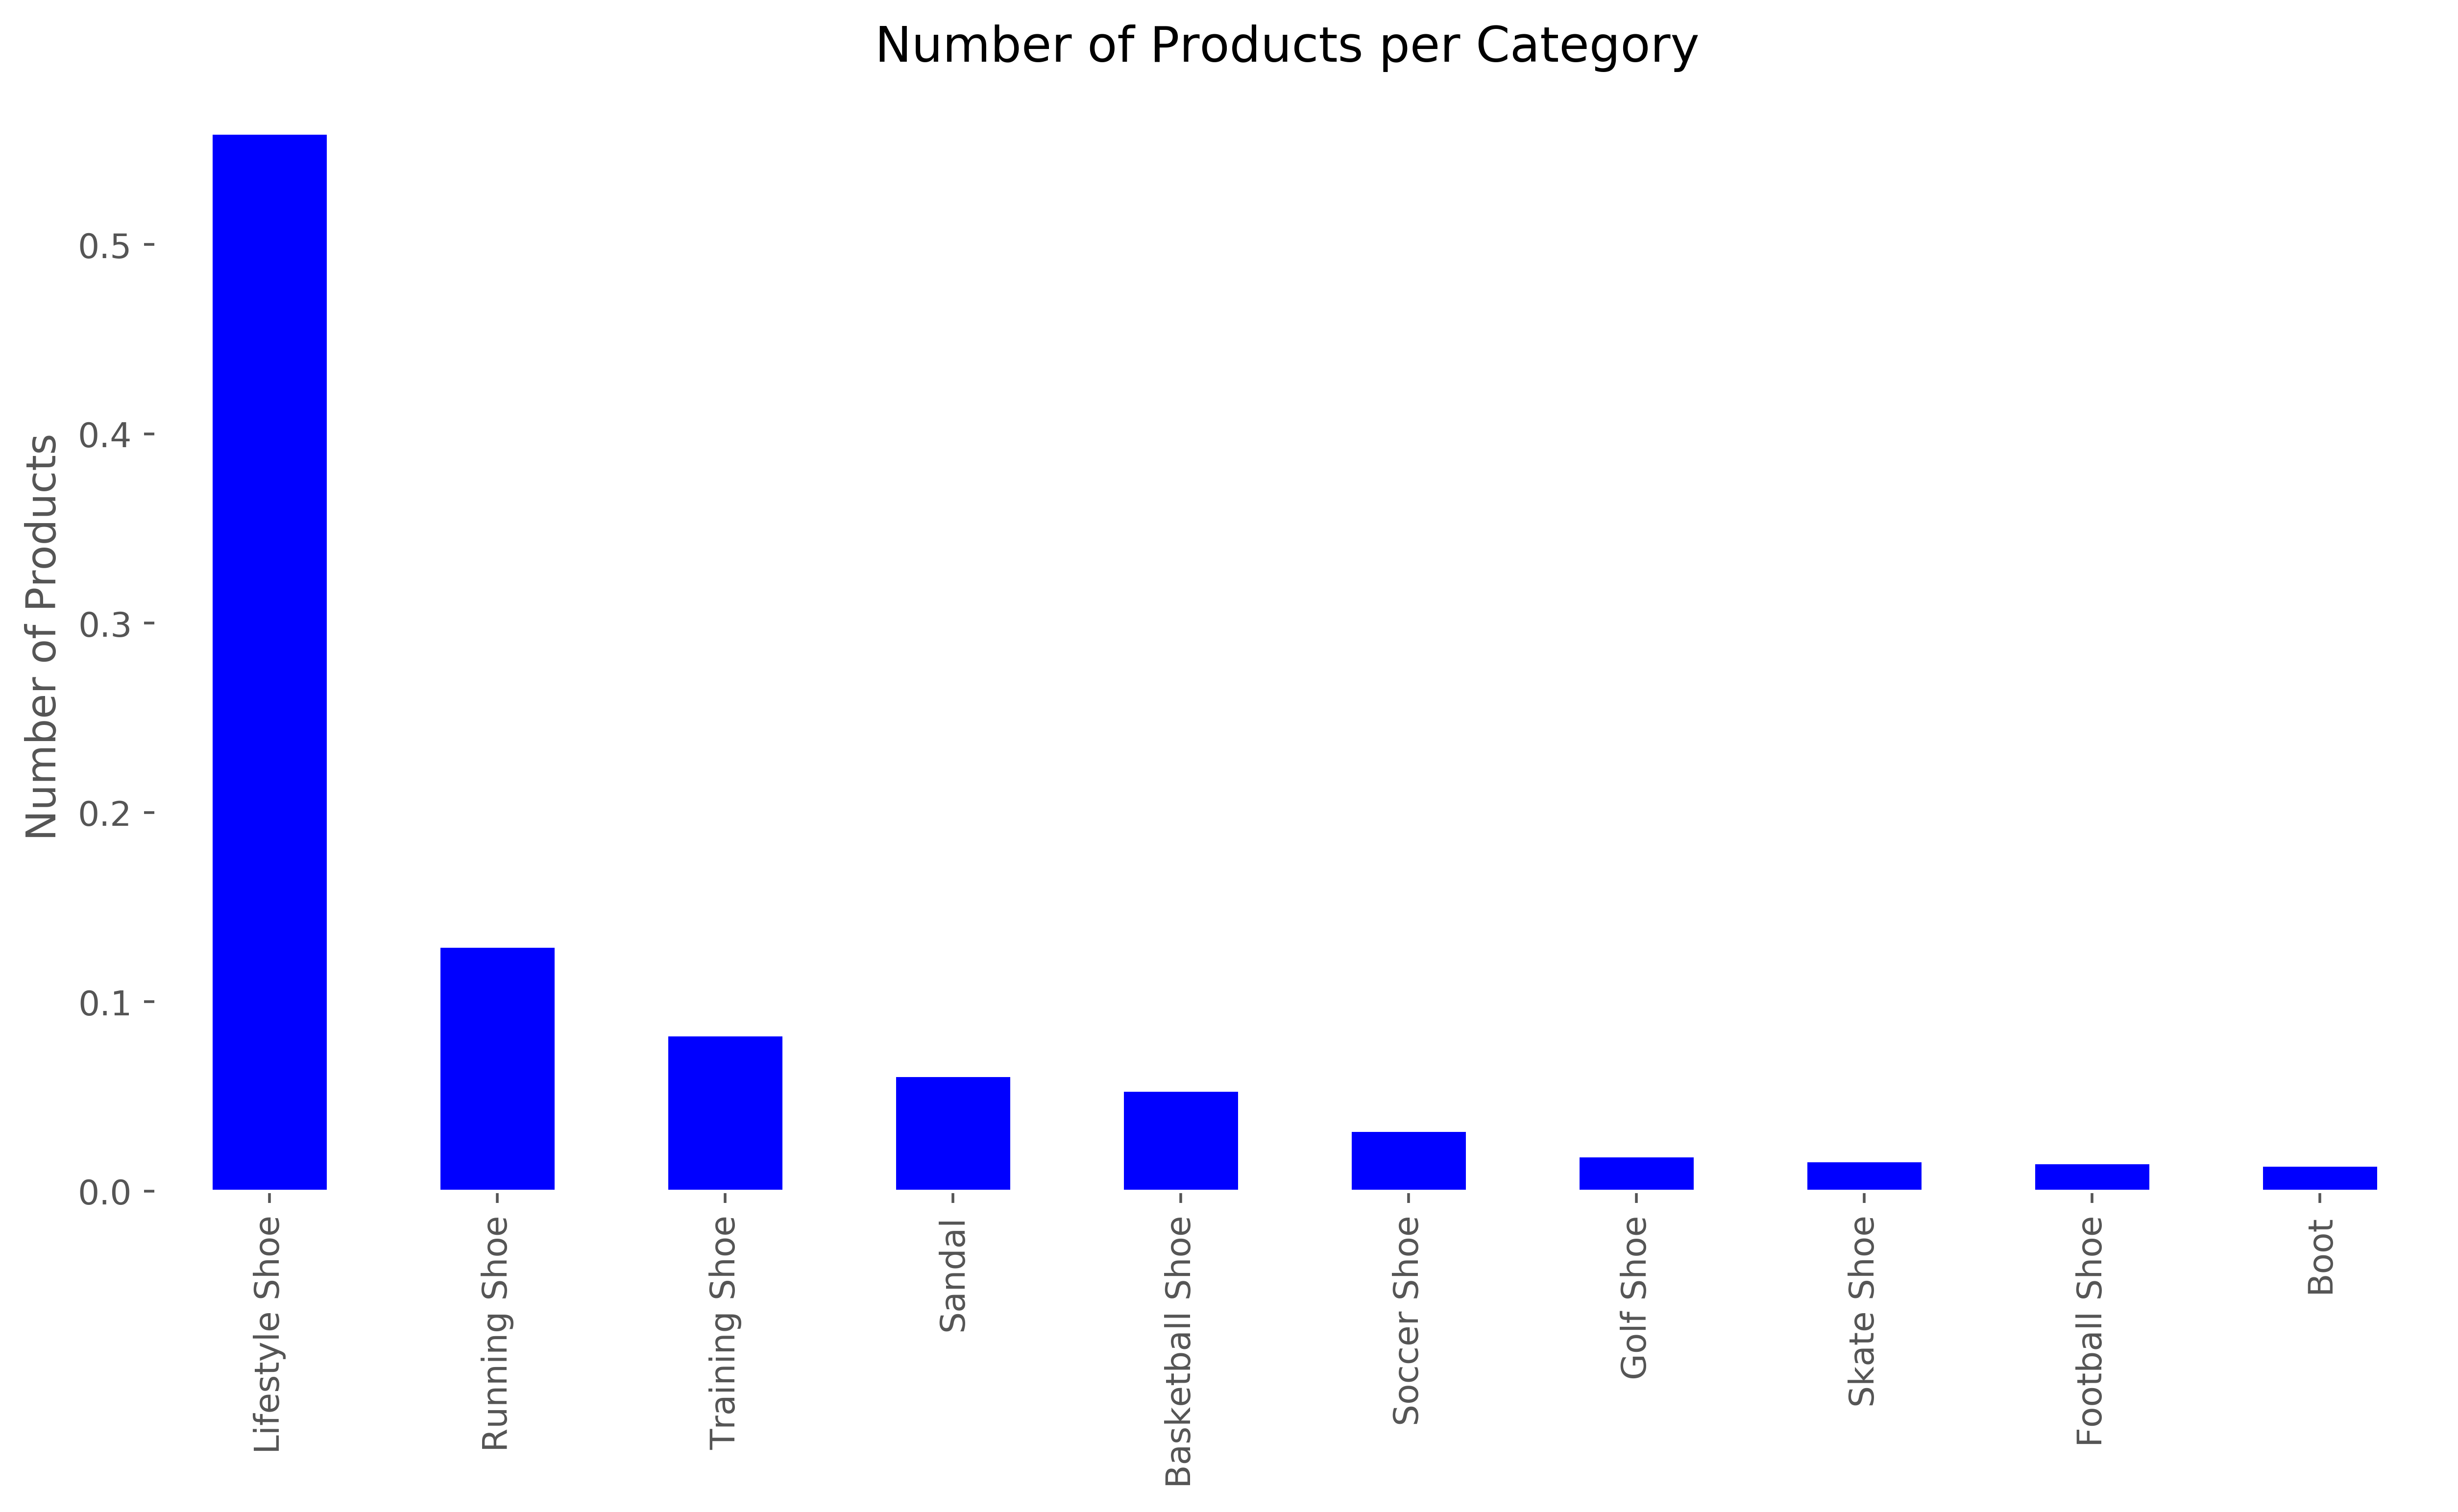

In [10]:
# 1. Bar graph of number of products per category for Men
plt.figure(figsize=(12,6), dpi=500)

a = df[df['gender']=='men'].category.value_counts(normalize=True).head(10)
print(round((a*100),1))
plt.figure(figsize=(12,6), dpi=500)
a.plot.bar(color='b').set_facecolor('xkcd:white')
plt.ylabel('Number of Products')
plt.title('Number of Products per Category ')

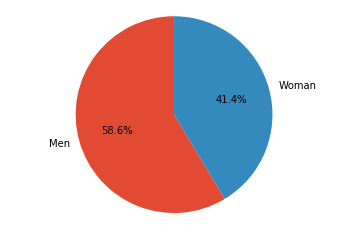

In [180]:
# Pie chart of distribuition of products by gender

products_men = df[df['gender'] == 'men'].groupby('category')['id_'].nunique().sum()
products_woman = df[df['gender'] == 'woman'].groupby('category')['id_'].nunique().sum()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Men', 'Woman'
sizes = [products_men, products_woman]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('pie.png', dpi=300)
plt.show()

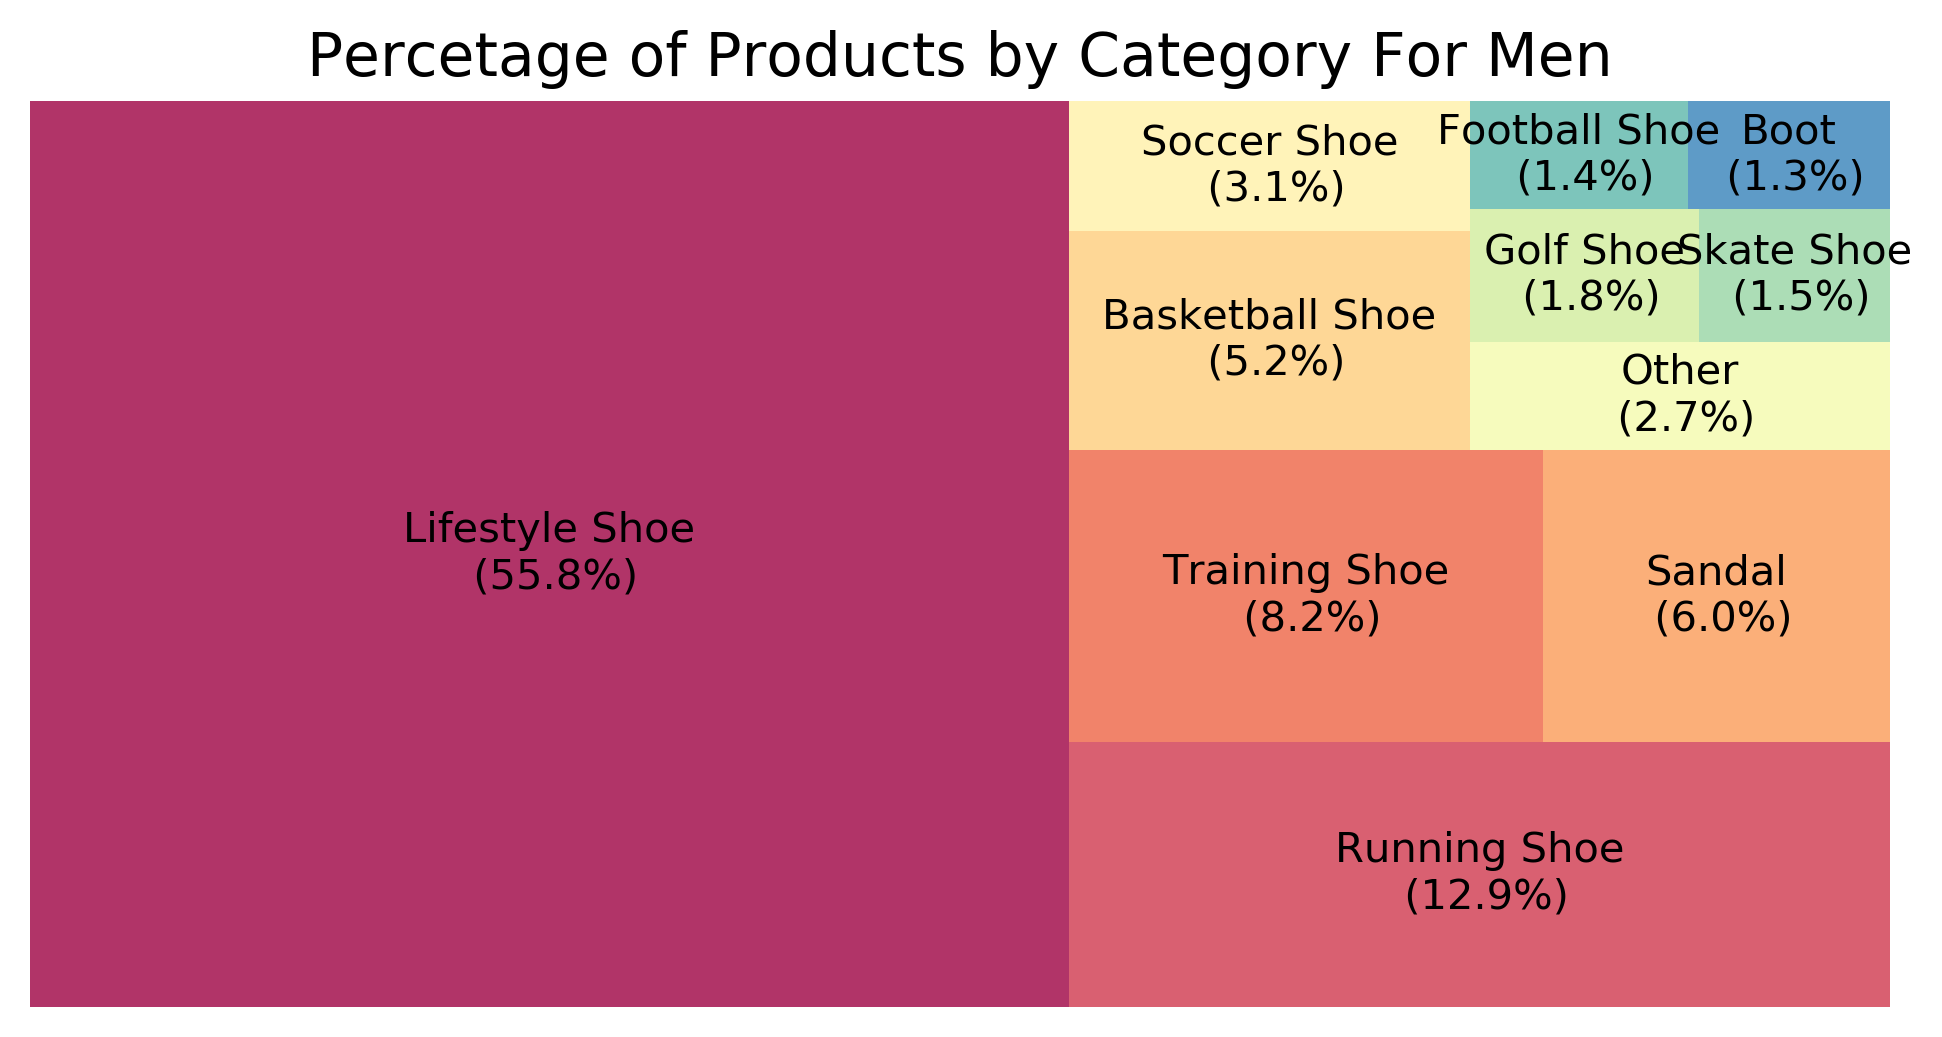

In [154]:
# 1. Treemap of percentage of products per category for men
df1 = df[df['gender']=='men'].groupby('category').size().reset_index(name='counts')
df1['counts'] = (100. * df1['counts'] / df1['counts'].sum()).round(1)
df1['category'] = np.where(df1.counts < 1,'Other', df1.category)
df1 = df1.groupby('category').sum().sort_values(by = 'counts', ascending=False).reset_index()
labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + "%)", axis=1)
sizes = df1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(8,4), dpi= 300)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Percetage of Products by Category For Men')
plt.axis('off')
plt.show()

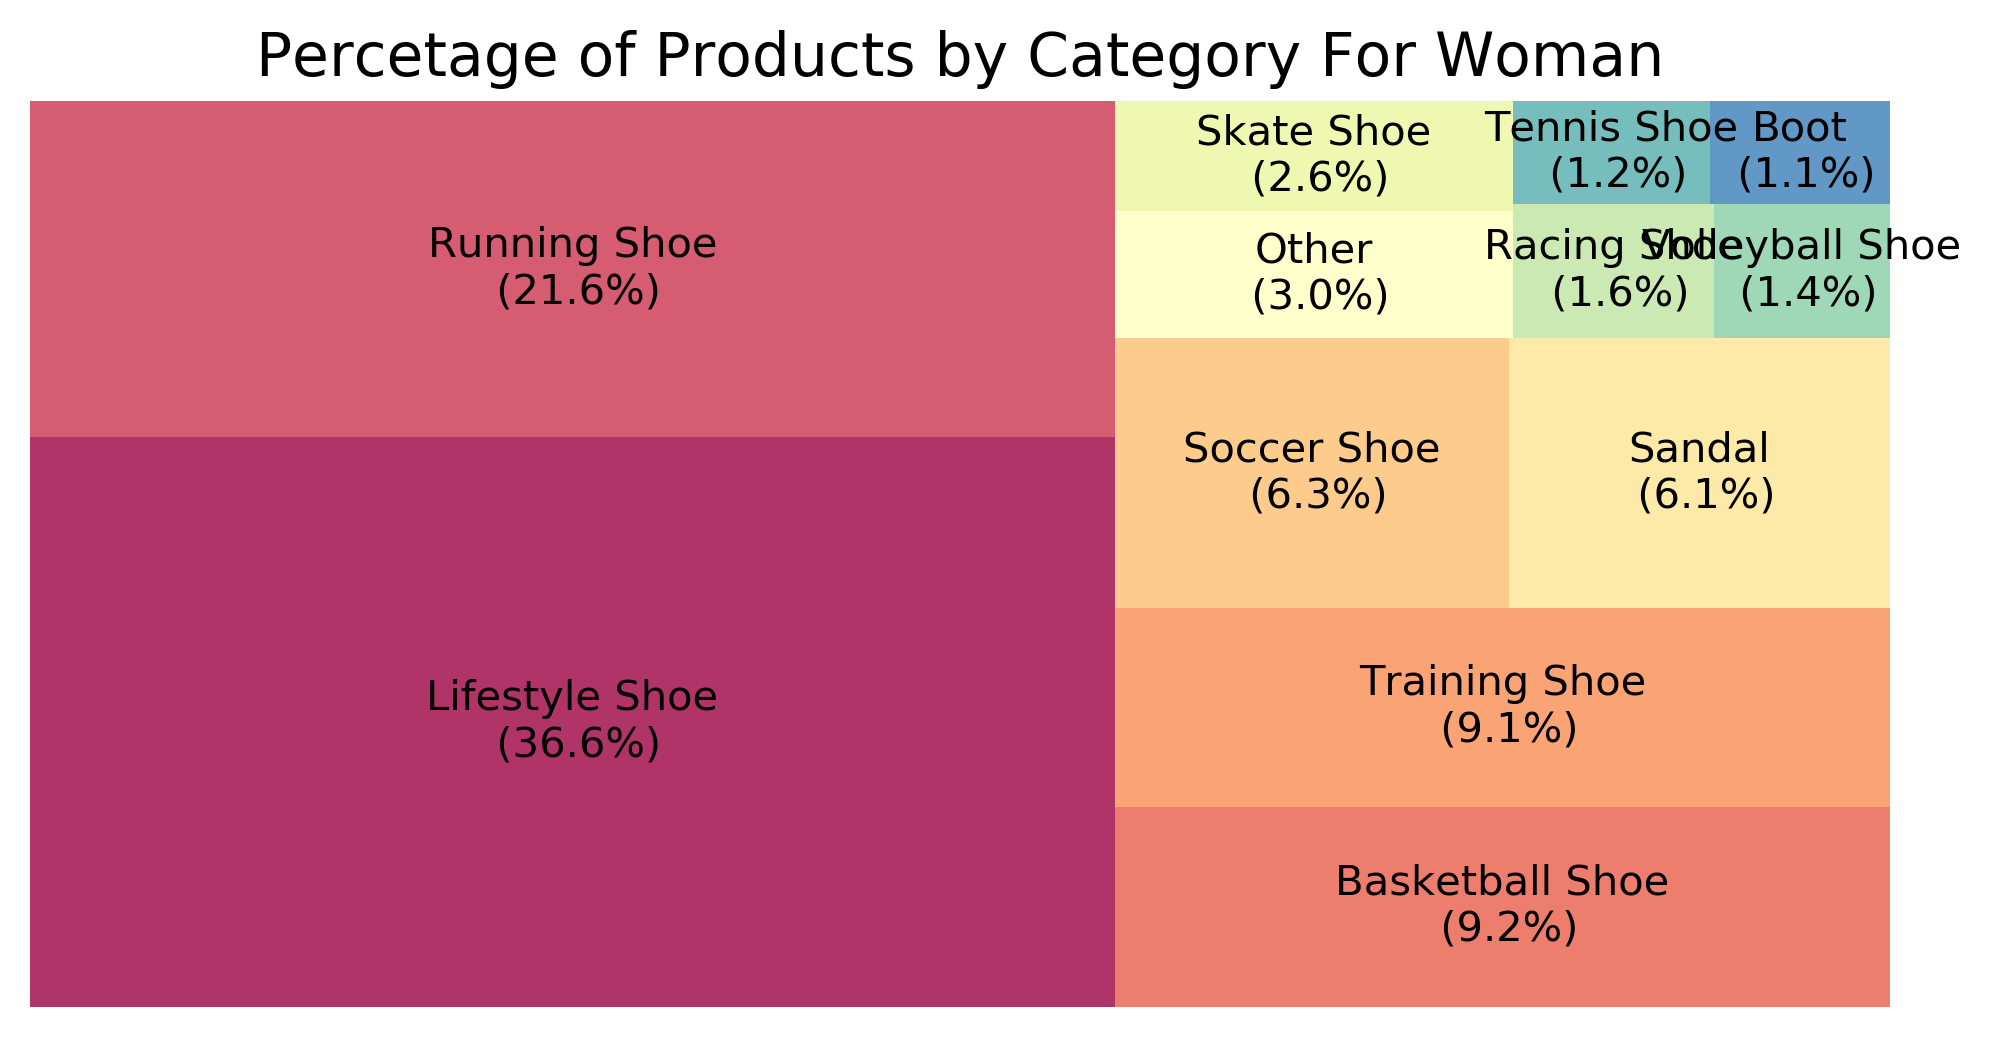

In [155]:
# 1. Treemap of percentage of products per category for woman
df1 = df[df['gender']=='woman'].groupby('category').size().reset_index(name='counts')
df1['counts'] = (100. * df1['counts'] / df1['counts'].sum()).round(1)
df1['category'] = np.where(df1.counts < 1,'Other', df1.category)
df1 = df1.groupby('category').sum().sort_values(by = 'counts', ascending=False).reset_index()
labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + "%)", axis=1)
sizes = df1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(8,4), dpi= 300)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Percetage of Products by Category For Woman')
plt.axis('off')
plt.show()

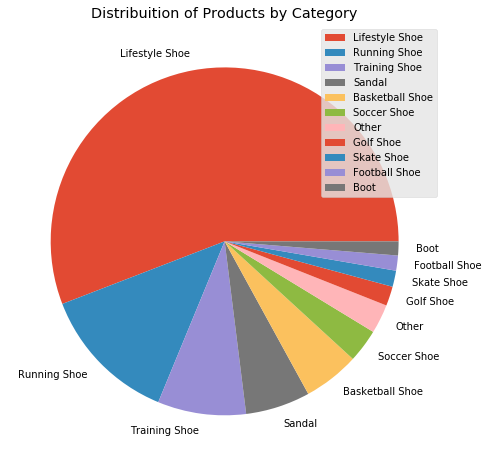

In [129]:
# 1. Pie chart of number of products per category by Gender

# Preparing the data
df_men = df[df['gender']=='men'].groupby('category').size().reset_index(name='counts')
df_men['counts'] = (100. * df_men['counts'] / df_men['counts'].sum()).round(1)
df_men['category'] = np.where(df_men.counts < 1,'Other', df_men.category)
df_men = df_men.groupby('category').sum().reset_index()

df_woman = df[df['gender']=='woman'].groupby('category').size().reset_index(name='counts')
df_woman['counts'] = (100. * df_woman['counts'] / df_woman['counts'].sum()).round(1)
df_woman['category'] = np.where(df_woman.counts < 2,'Other', df_woman.category)
df_woman = df_woman.groupby('category').sum().reset_index()

# Men pie chart
df_men1 = df_men.groupby('category').mean().sort_values(by = 'counts', ascending=False)
df_men1.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Distribuition of Products by Category")
plt.ylabel("")
plt.show()


In [ ]:
# 2. Bar graph of number of reviews per category by gender